In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

file_path = '../data/raw/housing_limpio.csv'
df = pd.read_csv(file_path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_<1H OCEAN,ocean_INLAND,ocean_ISLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_<1H OCEAN     20640 non-null  int64  
 10  ocean_INLAND        20640 non-null  int64  
 11  ocean_ISLAND        20640 non-null  int64  
 12  ocean_NEAR BAY      20640 non-null  int64  
 13  ocean_NEAR OCEAN    20640 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 2.2 MB


Muestra las relaciones entre si, 1.0 Correlacion perfecta, 0.0 No hay correlacion, -1.0 Correlacion negativa perfecta

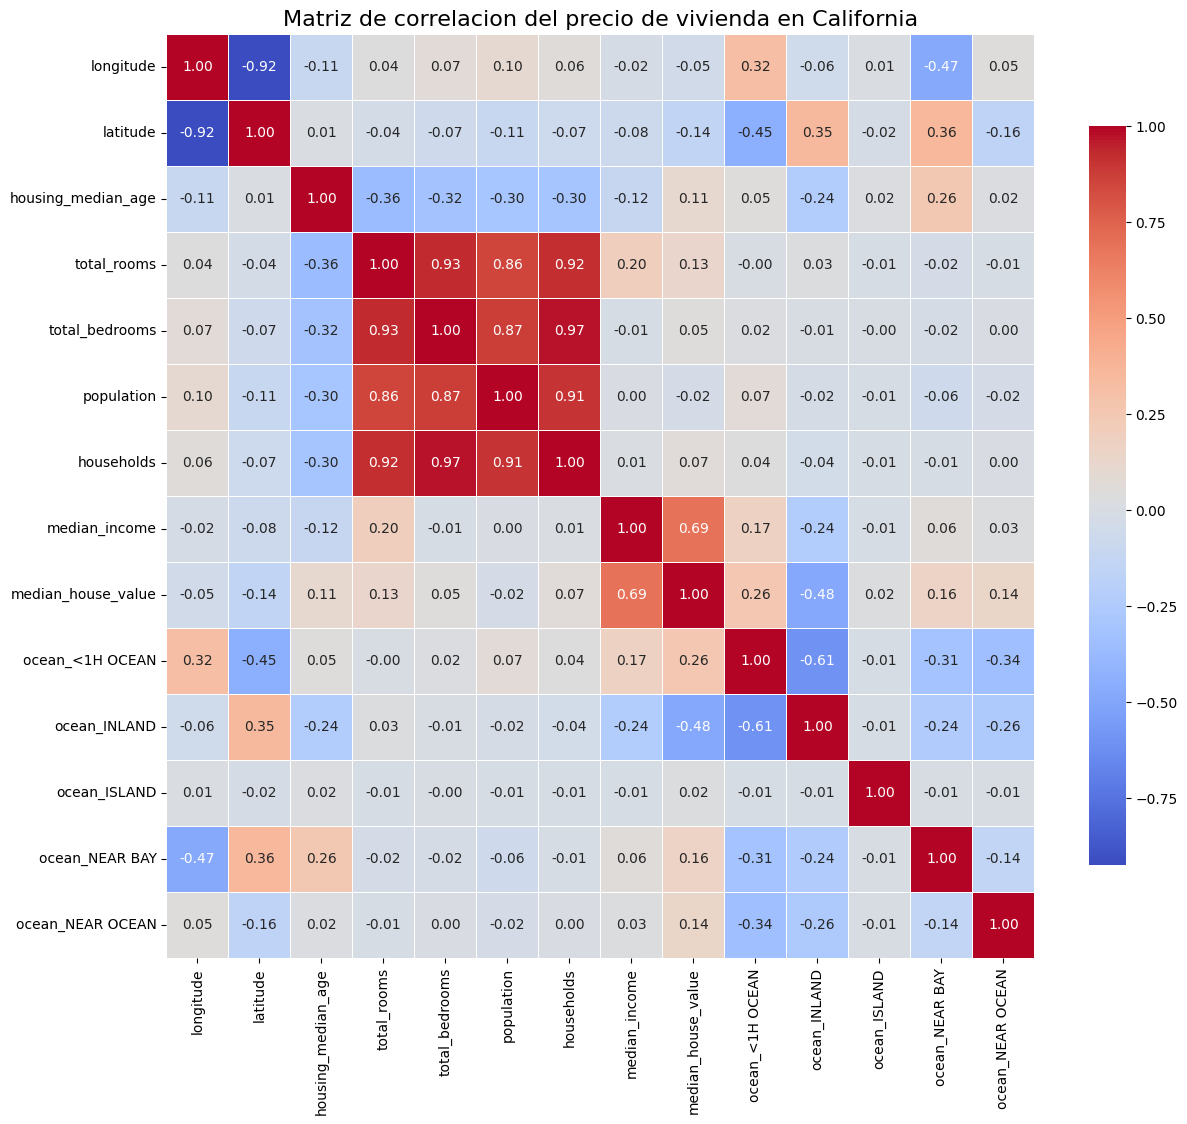

In [4]:
corr_matrix = df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot= True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={'shrink': .8})
plt.title('Matriz de correlacion del precio de vivienda en California', fontsize=16)
plt.show()

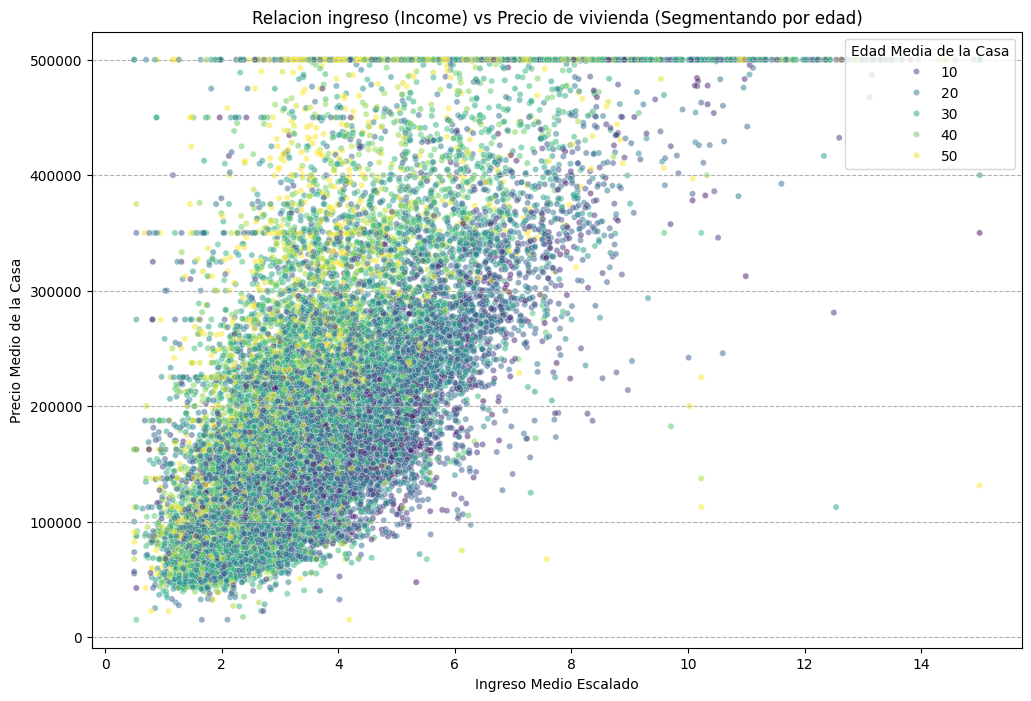

In [5]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='median_income', y='median_house_value', hue='housing_median_age', data=df, palette='viridis', alpha=0.5, s=20)
plt.title('Relacion ingreso (Income) vs Precio de vivienda (Segmentando por edad)')
plt.xlabel('Ingreso Medio Escalado')
plt.ylabel('Precio Medio de la Casa')
plt.legend(title='Edad Media de la Casa', loc='upper right')
plt.grid(axis='y', linestyle='--')
plt.show()

c:\Users\rojas\OneDrive\Escritorio\challenges01_the_hatch\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127958 (\N{BEACH WITH UMBRELLA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


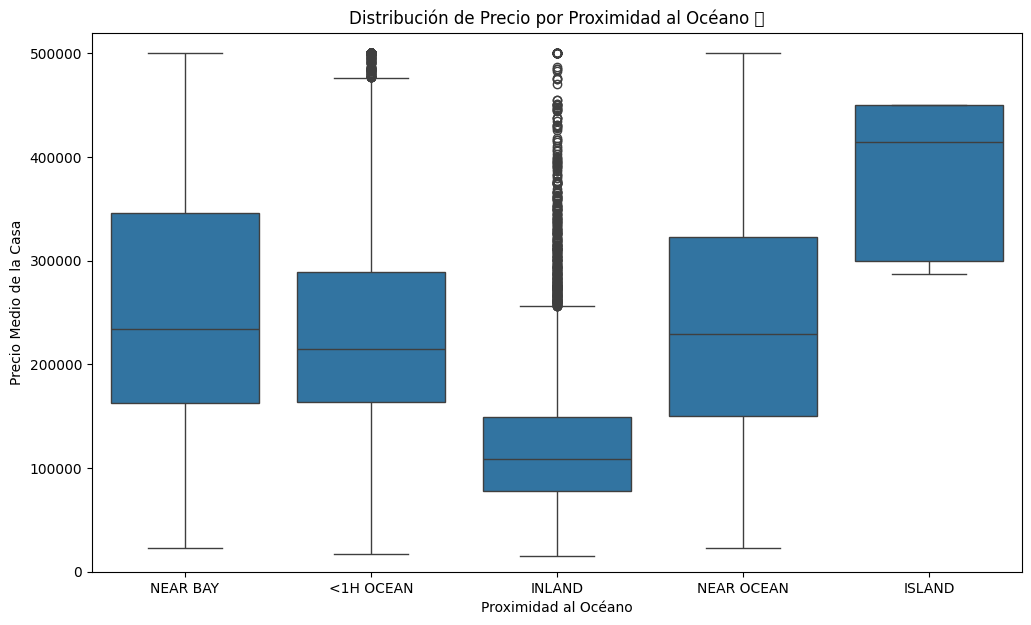

In [6]:
# -----------------------------------------------------
# Box Plot: Distribución de Precios por Proximidad al Océano
# -----------------------------------------------------

# 1. Creamos una columna temporal 'temp_proximity'
# idxmax(axis=1) encuentra el nombre de la columna (categoría) que tiene el valor máximo (que es 1)
df['temp_proximity'] = df.filter(like='ocean_').idxmax(axis=1)

# 2. Limpiamos los nombres de la columna temporal para que se vean bien en el eje X
df['temp_proximity'] = df['temp_proximity'].str.replace('ocean_', '')

plt.figure(figsize=(12, 7))
# Generamos el Box Plot
sns.boxplot(x='temp_proximity', y='median_house_value', data=df)

plt.title('Distribución de Precio por Proximidad al Océano 🏖️')
plt.xlabel('Proximidad al Océano')
plt.ylabel('Precio Medio de la Casa')
plt.ylim(0, 520000) # Limitamos Y para visualizar mejor la dispersión
plt.show()

# Opcional: Eliminamos la columna temporal después de usarla
df.drop('temp_proximity', axis=1, inplace=True)

In [7]:
# --- 1. FEATURE ENGINEERING ---
# Creamos variables con más sentido humano
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

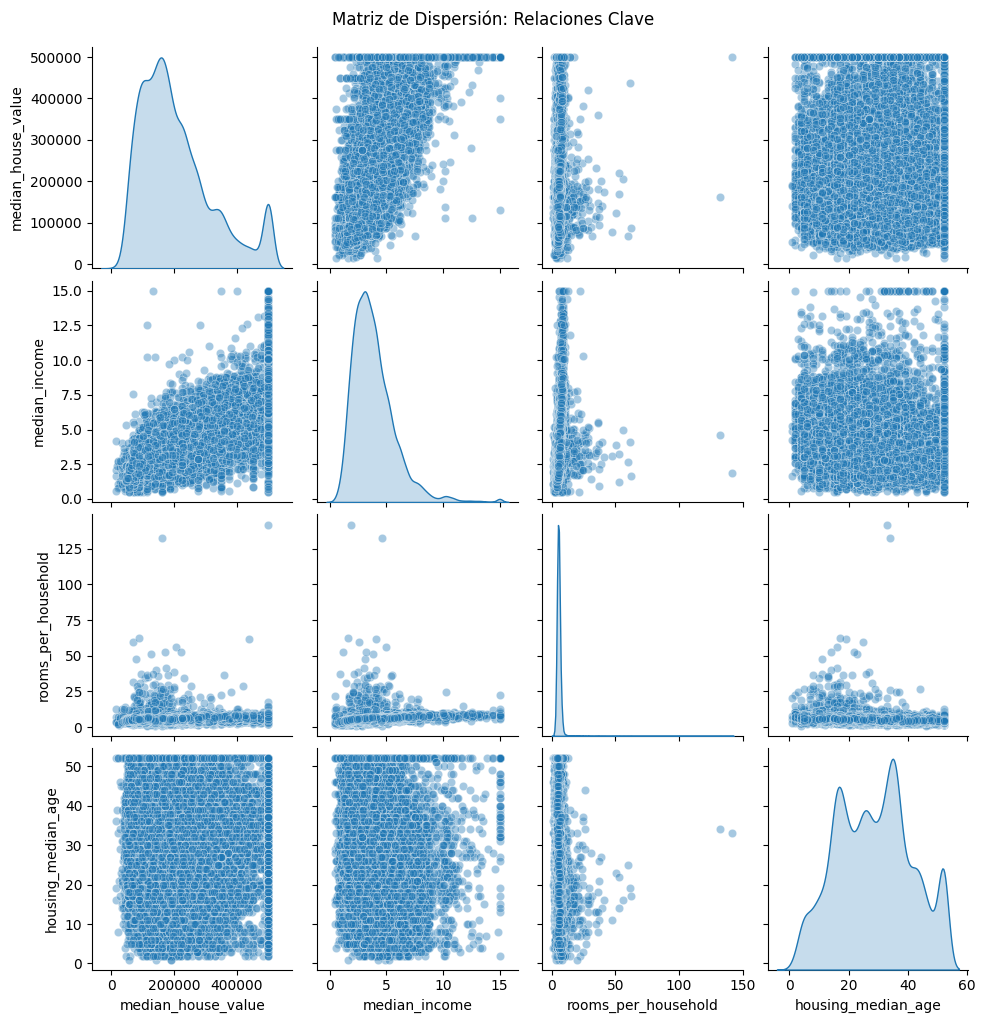

In [8]:
# --- 2. PAIRPLOT (REQUISITO OBLIGATORIO) ---
# Seleccionamos las variables más importantes para no saturar la PC
cols_interes = ['median_house_value', 'median_income', 'rooms_per_household', 'housing_median_age']
sns.pairplot(df[cols_interes], diag_kind='kde', plot_kws={'alpha': 0.4})
plt.suptitle('Matriz de Dispersión: Relaciones Clave', y=1.02)
plt.show()

c:\Users\rojas\OneDrive\Escritorio\challenges01_the_hatch\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127958 (\N{BEACH WITH UMBRELLA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


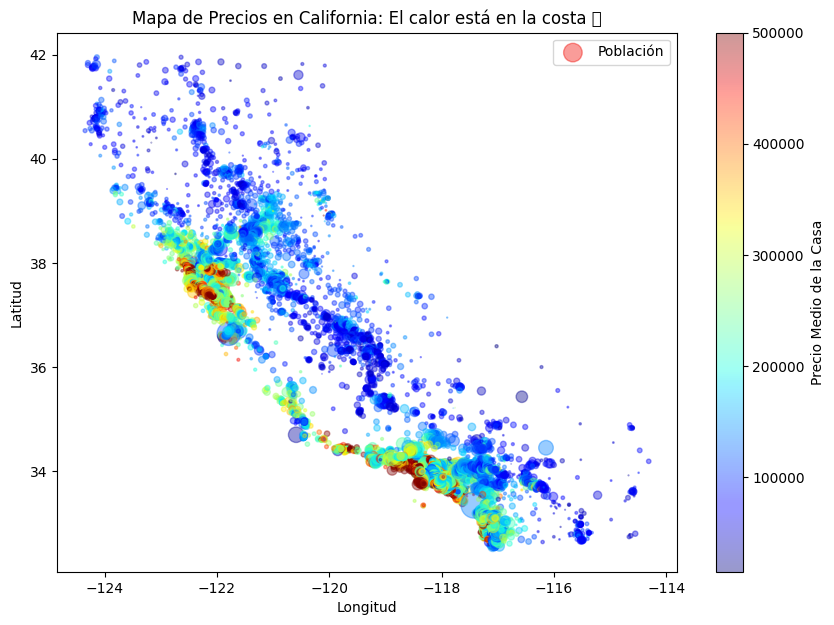

In [11]:
# --- 3. EL MAPA DE CALIFORNIA (VISUALIZACIÓN POTENTE) ---
plt.figure(figsize=(10, 7))

# 1. Graficamos. Guardamos el resultado en una variable llamada 'puntos'
puntos = plt.scatter(df['longitude'], df['latitude'], alpha=0.4,
            s=df['population']/100, label='Población',
            c=df['median_house_value'], cmap=plt.get_cmap('jet'))

plt.ylabel('Latitud')
plt.xlabel('Longitud')
plt.title('Mapa de Precios en California: El calor está en la costa 🏖️')

# 2. Ahora sí, añadimos la barra de colores usando la variable 'puntos'
cbar = plt.colorbar(puntos)
cbar.set_label('Precio Medio de la Casa')

plt.legend()
plt.show()

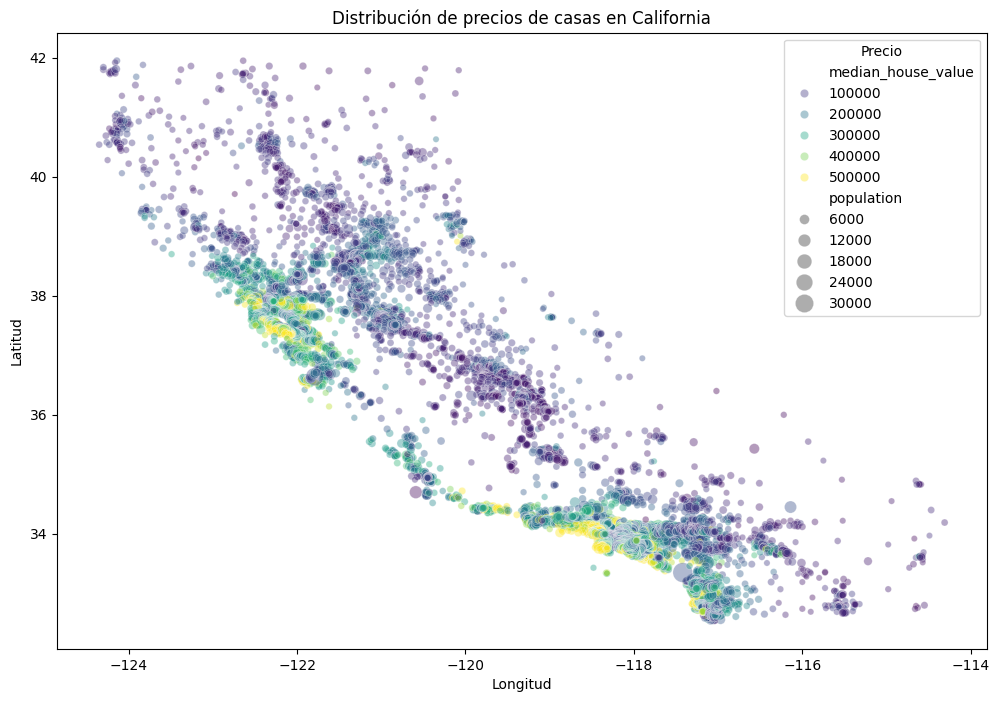

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='longitude', y='latitude',
    hue='median_house_value',
    palette='viridis',
    data=df,
    size= "population",
    sizes = (20,200),
    alpha=0.4
)
plt.title("Distribución de precios de casas en California")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend(title='Precio', loc='upper right')
plt.show()

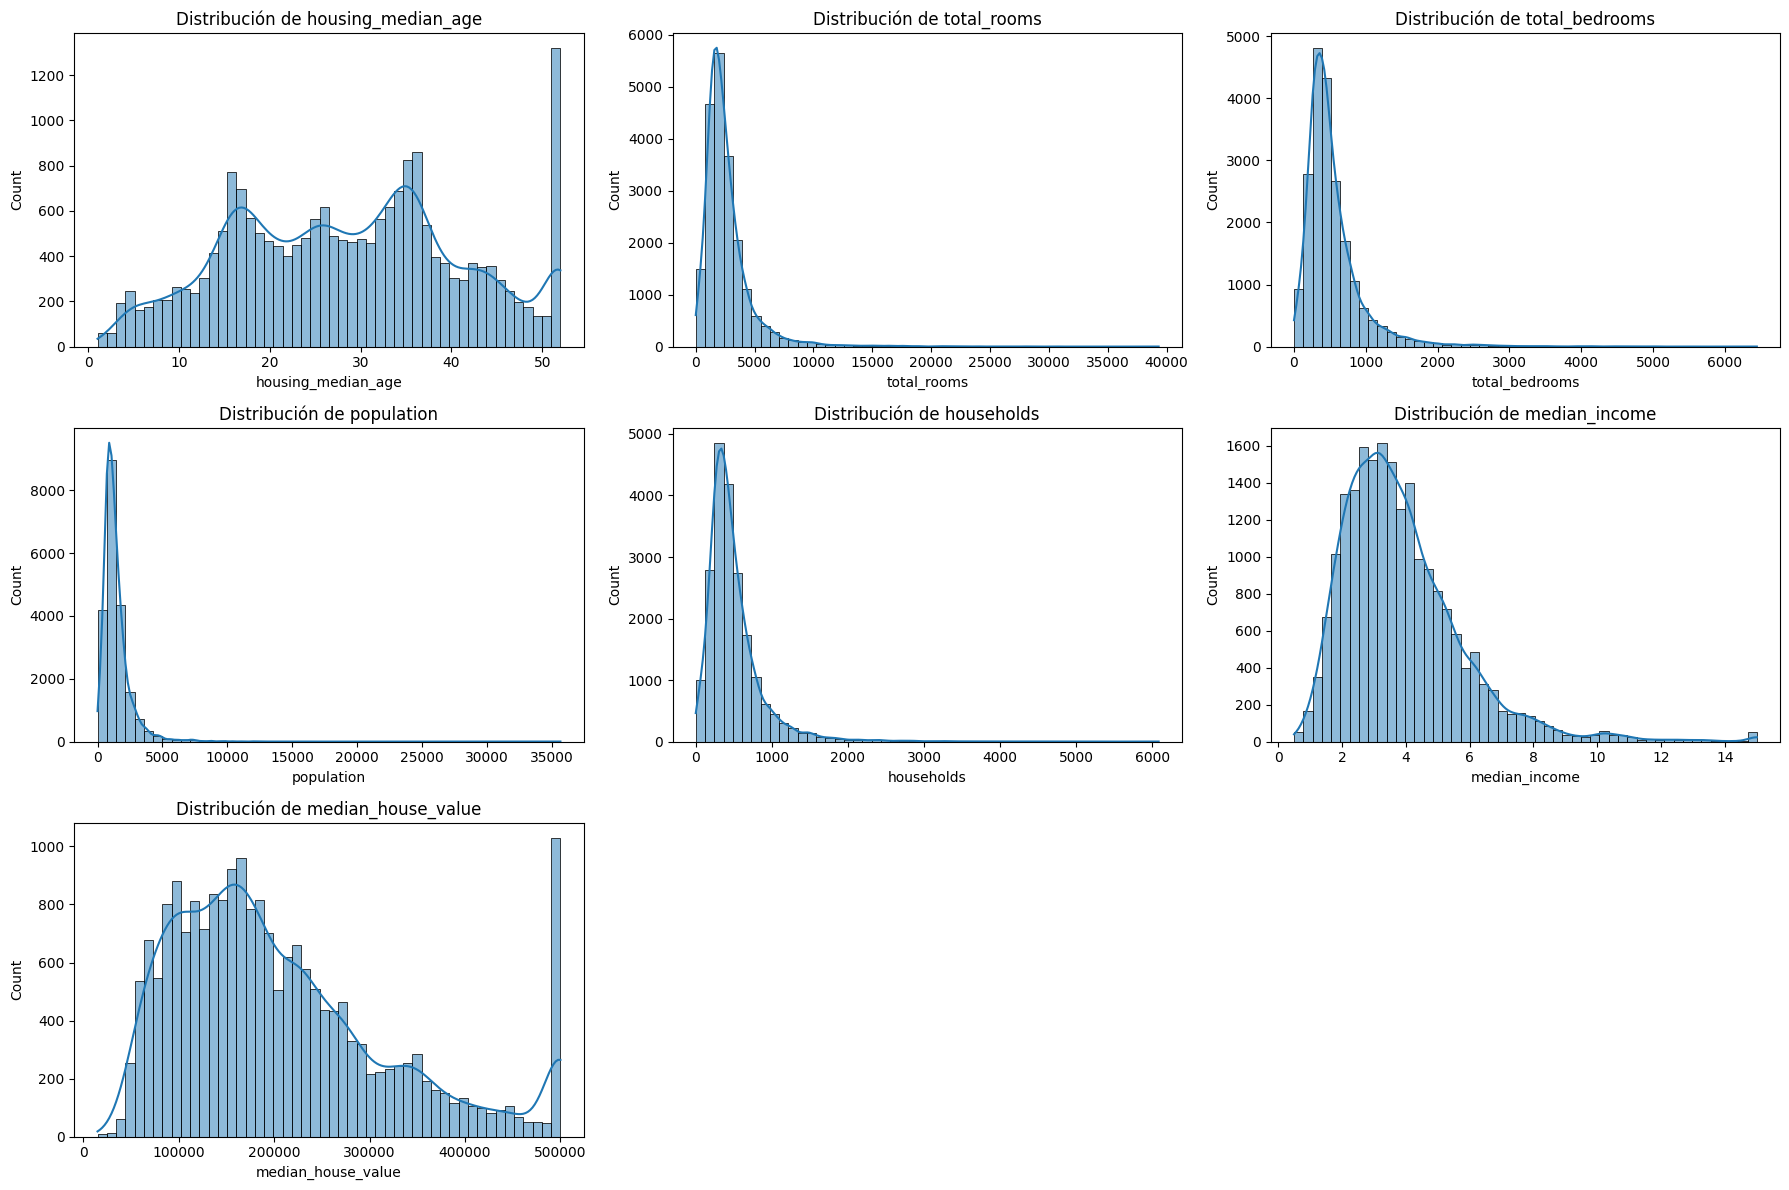

In [13]:
num_cols = ['housing_median_age','total_rooms','total_bedrooms','population',
            'households','median_income','median_house_value']

plt.figure(figsize=(18,12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3,3,i)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()